# Multiclass classification
---------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load the dataset's features and targets
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look at a subsample of the data
X.sample(frac=1).iloc[:5, :8]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=-1, warnings='ignore', verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(
    models=['LR','LDA', 'RF'],
    metric='roc_auc_ovr',
    n_calls=4,
    n_initial_points=3,
    bo_params={'base_estimator': 'rf', 'max_time': 100},
    bagging=5
)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.
Parallel processing with 16 cores.
Applying data cleaning...

Dataset stats ================= >>
Shape: (178, 14)
Scaled: False
----------------------------------
Train set size: 143
Test set size: 35
----------------------------------
Train set balance: 0:1:2 <==> 1.4:1.7:1.0
Test set balance: 0:1:2 <==> 0.7:1.0:1.0
----------------------------------
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |       59 |           50 |           9 |
|  1 |       71 |           58 |          13 |
|  2 |       48 |           35 |          13 |


Running pipeline ============================= >>
Models in pipeline: LR, LDA, RF
Metric: roc_auc_ovr


Running BO for Logistic Regression...
Initial point 1 ---------------------------------
Parameters --> {'penalty': 'l2', 'C': 46.003, 'solver': 'lbfgs', 'max_iter': 745}
Evaluation -

## Analyze the results

In [4]:
# We can access the pipeline's results via the results attribute
atom.results

,name,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
model,,,,,,,,,,
LR,Logistic Regression,1.00000,13.115s,1.000000,0.996503,0.024s,0.994172,0.002553,0.084s,13.229s
LDA,Linear Discriminant Analysis,1.00000,0.477s,1.000000,1.000000,0.015s,0.999767,0.000466,0.026s,0.523s
RF,Random Forest,0.99499,2.124s,0.999928,0.976690,0.354s,0.975058,0.012652,1.568s,4.050s


In [5]:
# Show the scoring for a different metric than the one we trained on
atom.scoring('precision_macro')

Results ===================== >>
Logistic Regression          --> precision_macro: 0.956
Linear Discriminant Analysis --> precision_macro: 0.976
Random Forest                --> precision_macro: 0.9


**Let's have a closer look at the Random Forest**

In [6]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.scoring('jaccard_weighted'))
print('Recall score:', atom.rf.scoring('recall_macro'))

Jaccard score: 0.7957142857142857
Recall score: 0.8974358974358975


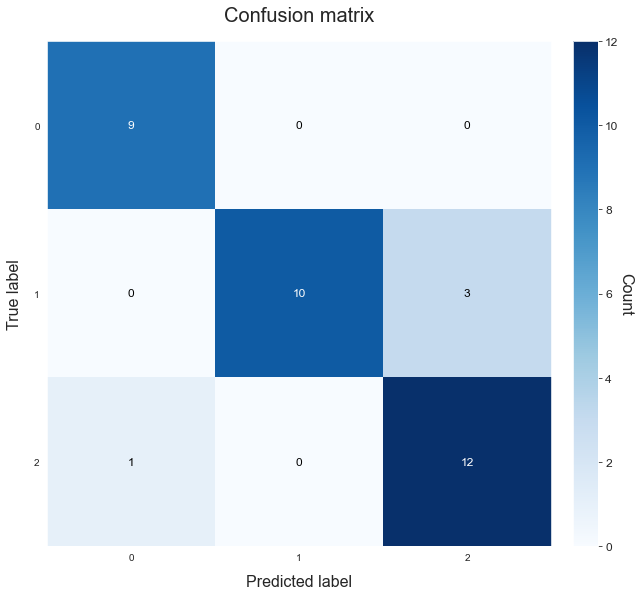

In [7]:
# Plot the confusion matrix
atom.RF.plot_confusion_matrix(figsize=(9, 9))

In [8]:
# Save the estimator as a pickle file
atom.RF.save_estimator('Random_Forest_model')

Random Forest estimator saved successfully!
